In [1]:
!pip install pandas numpy 

In [2]:
import os

In [3]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("D:\\aravind vs code\\simple linear regression\\Salary_dataset.csv")

In [6]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [7]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [8]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Text(0, 0.5, 'Salary')

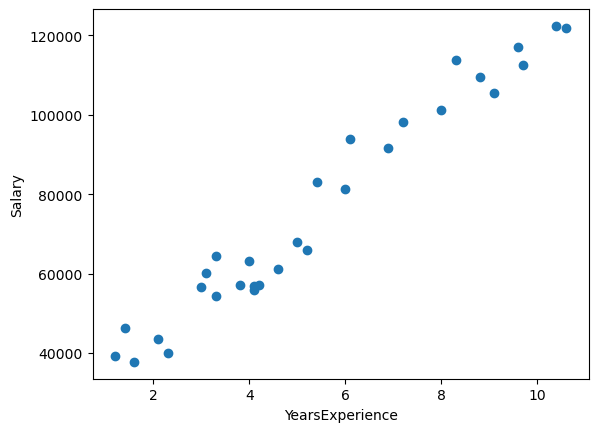

In [9]:
df.drop_duplicates(inplace= True)
import matplotlib.pyplot as plt

plt.scatter(df.YearsExperience, df.Salary)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [10]:
from sklearn import metrics, linear_model, model_selection

In [11]:
x = df.drop(columns = ['Salary'])
y = df['Salary']

x.shape, y.shape
y=y.values.reshape(-1,1)
y.shape

(30, 1)

In [12]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [13]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x,y, test_size = 0.1 , random_state = 42)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred = lr_model.predict(x_test)
y_pred_train = lr_model.predict(x_train)
accuracy = metrics.r2_score(y_test, y_pred)
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
print(" Linear Regression Model Accuracy = ", accuracy*100, "%")
print("Mean Absolute Error = ", MAE)
print("Mean Squared Error = ", MSE)

 Linear Regression Model Accuracy =  89.28775350863081 %
Mean Absolute Error =  0.07235329963521236
Mean Squared Error =  0.006814748348212403


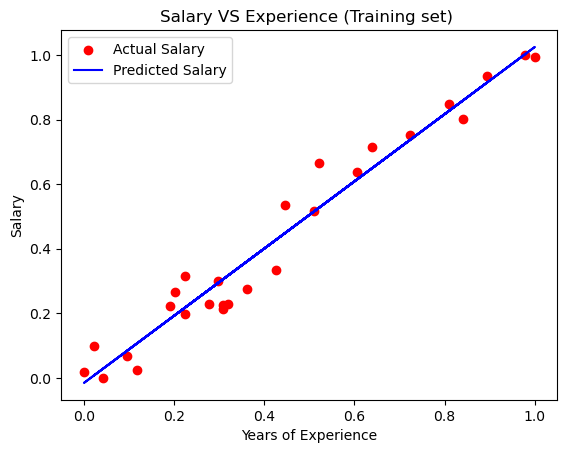

In [20]:
plt.scatter(x_train, y_train, color = 'r', label = 'Actual Salary')
plt.plot(x_train, y_pred_train, color = "b", label = 'Predicted Salary')
#plt.plot(x_train,y_pred, color = 'b')
plt.title('Salary VS Experience (Training set) ')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()